# Sprint 機械学習スクラッチ　クラスタリング

In [1]:
import numpy as np
import random
import pandas as pd
from numpy import linalg as LA
import matplotlib.pyplot as plt
#import japanize_matplotlib

In [2]:
# シンプルデータセット
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)


In [3]:
print(X.shape)
print(X[:4])

(100, 2)
[[ 0.72086751  3.71347124]
 [-1.89468423  7.96898545]
 [ 1.35678894  4.36462484]
 [ 1.05374379  4.49286859]]


### 【問題1】中心点の初期値を決める

In [4]:
# XからランダムにK個の点を決める（K＝３）

index = np.array(len(X))
random_index = np.random.choice(index, 3, replace=False)
μ = X[random_index]
print(μ)

[[ 1.19820169  4.47062449]
 [-0.69842598  8.16309188]
 [-0.59312453  3.37090459]]


### 【問題2】SSEを求める関数の作成

In [5]:
#SSE

# μまでの距離のデータの最小値

norm = []
for n in range(len(X)):
    for k in range(len(μ)):
        norm.append(np.linalg.norm(X[n] - μ[k])**2)
norm = np.array(norm).reshape(len(X), len(μ))
#print(norm)
norm_min = np.amin(norm, axis=1) # 各行の最小値
print(norm_min)
SSE = sum(norm_min)
print(SSE)


[ 0.80112898  1.46871111  0.03638584  0.02136289  0.34327935  0.27383594
  2.1135806   0.08621729  1.8095224   0.73947027  1.34353719  2.312407
  1.15545535  0.25395804  0.44133943 21.27076313  6.50543746  0.06682649
  1.80636583 19.59489379  1.63274161  1.56110438  1.77270337 18.80788019
  0.44915938  1.58215086  0.0832708   0.16458813  9.45452585 15.50924057
 12.38459425  1.33014548 14.64272321  7.92612573  0.39286807  0.3569763
  1.04409491  9.20154429  0.3988289   2.45642033  0.33640859  0.74161488
  2.8314353   1.94375714  1.9197381   1.36045645 12.52966226  1.57993954
  0.3761969   1.27006219  0.76890576 12.19193238  0.72709     1.54803678
  1.12326707  0.80115346  0.03395074 13.80169106 11.4380428   0.03056762
  1.55872039  8.25181017 12.21751623  0.61887929  8.00707271  0.
  3.00121698  1.54047287 10.43892384  0.          1.13855823  8.35943228
  0.07630403  0.70634791  0.10744515  0.33357798  0.          1.14283925
 16.04787084  8.38685333 16.15719844  1.04271034  0.65986362  

### 【問題3】クラスタへの割り当て

In [6]:
print(X[0])

[0.72086751 3.71347124]


In [7]:
# 全てのデータXを最も近いμに割り当てる
#for n in range(len(X)):

# μとXの距離を求める
distance = []
for k in range(len(μ)):
    for n in range(len(X)):
        distance.append(np.linalg.norm(X[n] - μ[k]))
distance = np.array(distance)
distance = distance.reshape(len(X), len(μ))
print(distance[:4])

# distanceの最小値のインデックスデータmin_disを作る（クラス分け）
min_index = np.argmin(distance, axis=1)# 最小距離のインデックス
#min_index = min_index.reshape(len(X), 1)
min_index = min_index.astype(int) # 整数配列にする
print(min_index.dtype)
print(min_index[:20])

# X配列と結合、クラスへの割り当て付きデータにする
X_clus = pd.DataFrame(X)
min_index1 = pd.DataFrame(min_index)
min_index = min_index1.rename(columns={0:"clus"})
min_index.head()
X_clus = pd.concat([X_clus, min_index], axis=1)
X_clus.head()

[[0.89505809 4.66952597 0.19075073]
 [0.14616048 0.58590046 0.52329336]
 [3.21182448 3.93781874 1.34518489]
 [4.17772519 3.32513238 3.92467107]]
int64
[2 0 2 1 2 2 2 1 0 0 1 2 1 1 1 2 0 1 0 1]


,0,1,clus
0,0.720868,3.713471,2
1,-1.894684,7.968985,0
2,1.356789,4.364625,2
3,1.053744,4.492869,1
4,1.591415,4.904977,2


###  【問題4】中心点の移動

In [8]:
# k番目のクラスの中心点の算出

#k = 0
μ_new = [] # 移動先の中心点を入れるリストを用意
for k in range(len(μ)): # Kの数分ループ
    X_clus_copy = X_clus.copy()
    # clus列にkの値を持つ行
    X_clus_copy = X_clus_copy[X_clus_copy["clus"].isin([k])] # クラス別データに分ける
    X_clus_copy = X_clus_copy.mean() # 列ごとの平均値（重心）＝次の中心点
    μ_new.append(X_clus_copy) # μ_newにμごと次の中心点を入れる
μ_new = np.array(μ_new) # リスト型をnumpyに変換
μ_new = μ_new[:, :-1] # 右端のクラス名の列を削除
print(μ_new)


[[-0.1619649   4.19613982]
 [-0.02069346  4.66623828]
 [ 0.35191536  3.2163293 ]]


### 【問題5】繰り返し

クラスタへの割り当てと中心点の移動を繰り返すことで学習を行うコードを作成してください。次のどれかの条件を満たしたらこれを止めます。<br>
繰り返しが指定した回数に到達する。（雛形では引数max_iter）<br>
中心点 
μ
k
 と重心の差が指定した許容値以下になる。（雛形では引数tol）

In [9]:
# クラスに入れて回したい

In [10]:
class ScratchKMeans():
    """
    K-meansのスクラッチ実装

    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """

    def __init__(self, n_clusters=3, n_init=5, max_iter=10, tol=0.001, verbose=True):
        # ハイパーパラメータを属性として記録
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose

    # XからランダムにK個の点を決める（K＝３）
    def _generation_μ_(self, X):
        index = np.array(len(X))
        random_index = np.random.choice(index, self.n_clusters, replace=False)
        self.μ = X[random_index]
        return self.μ

    # データXを最も近いμに割り当て、新しい中心点を求める（中心点の移動）
    def _move_μ_(self, X, μ):
        # μとXの距離を求める
        self.distance = []
        for k in range(len(μ)):
            for n in range(len(X)):
                self.distance.append(np.linalg.norm(X[n] - μ[k])) # Xとμの距離を計算
        self.distance = np.array(self.distance)
        self.distance = self.distance.reshape(len(X), len(μ))

        # distanceの最小値のインデックスデータmin_indexを作る（クラス分け）
        min_index = np.argmin(self.distance, axis=1)# 最小距離のインデックス
        min_index = min_index.astype(int) # 整数配列にする

        # X配列と結合、クラスへの割り当て付きデータにする
        X_clus = pd.DataFrame(X)
        min_index = pd.DataFrame(min_index)
        min_index = min_index.rename(columns={0:"clus"})
        X_clus = pd.concat([X_clus, min_index], axis=1)

        # k番目のクラスの中心点の算出
        μ_new = [] # 移動先の中心点を入れるリストを用意
        for k in range(len(μ)): # Kの数分ループ
            X_clus_copy = X_clus.copy()
            # clus列にkの値を持つ行
            X_clus_copy = X_clus_copy[X_clus_copy["clus"].isin([k])] # クラス別データに分ける
            X_clus_copy = X_clus_copy.mean() # 列ごとの平均値（重心）＝次の中心点
            μ_new.append(X_clus_copy) # μ_newにμごと次の中心点を入れる

        μ_new = np.array(μ_new) # リスト型をnumpyに変換
        μ_new = μ_new[:, :-1] # 右端のクラス名の列を削除
                
        return μ_new
    
    # 初期値を決定し、最も近い中心点に移動
    def _minimum_center_(self, X):
        self.μ = self._generation_μ_(X) # 初期μを決定
        #print("\n＝＝＝初期μ＝＝＝\n{}".format(self.μ))

        
        # 中心点への割り当て、割り当てを固定して中心点の移動
        self.μ_fit = []
        for m in range(self.max_iter):
            #print("\n------ {}回目の移動------".format(m+1))
            # 繰り返し条件を満たしたらbreak
            if m == 0: # 初回のみ初期のμを使う
                self.μ_fit = (self._move_μ_(X, self.μ)) # 初回μから中心点を移動
                #print("μ_fit\n{}".format(self.μ_fit))
                μ_differences = []
                for i in range(self.n_clusters):
                    μ_differences.append(np.linalg.norm(self.μ_fit[i] - self.μ[i])**2)
                μ_difference = np.amax(μ_differences) # 中心点の差の最大値
                #print("中心点の移動距離：{}".format(μ_difference))
            else: # 2回目以降は移動したμを使う
                self.μ_fit = (self._move_μ_(X, self.μ_fit)) # μ_fitから中心点を移動
                #print("self.μ_fit\n{}".format(self.μ_fit))
                μ_differences = []
                for i in range(self.n_clusters):
                    μ_differences.append(np.linalg.norm(self.μ_fit[i] - μ_previous[i])**2)
                μ_difference = np.amax(μ_differences) # 中心点の差の最大値
                #print("中心点の移動距離：{}".format(μ_difference))
                
                if(m == self.max_iter or μ_difference < self.tol):
                    break
            μ_previous = self.μ_fit.copy() # 次回、差を出すためにコピーしておく

        return self.μ_fit
    
    # μまでの距離のデータの最小値:正常のはず
    def _SSE_(self, X, μ):
        norm = []
        for n in range(len(X)):
            for k in range(len(μ)):
                norm.append(np.linalg.norm(X[n] - μ[k])**2)
        norm = np.array(norm).reshape(len(X), len(μ))
        norm_min = np.argmin(norm, axis=1)
        SSE = np.sum(norm_min)
        return SSE

    def fit(self, X):
        """
        K-meansによるクラスタリングを計算
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        """                

        #　初期値を変えてn_init回計算
        for n in range(self.n_init):
            min_μs = self._minimum_center_(X) # 異なる初期値で最も近い中心点に移動
            self.SSE = self._SSE_(X, min_μs)

            if n == 0:
                SSE_previous = self.SSE.copy()
                self.min_best = min_μs
                #print("\nn_init初回min_best:\n{}\n".format(self.min_best))
            else:
                if self.SSE > SSE_previous:
                    self.min_best = min_μs

        #print("\n====n_init{}回のmin_best===\n{}\n\n".format(self.n_init, self.min_best))            
        return self.min_best

    def predict(self, X):
        """
        入力されたデータがどのクラスタに属するかを計算
        """
        #def predict_Xclus(self, X, self.min_best):
        self.distance = []
        for k in range(len(self.min_best)):
            for n in range(len(X)):
                self.distance.append(np.linalg.norm(X[n] - self.min_best[k])) # Xとμの距離を計算
        self.distance = np.array(self.distance)
        self.distance = self.distance.reshape(len(X), len(self.min_best))

        # distanceの最小値のインデックスデータmin_indexを作る（クラス分け）
        min_index = np.argmin(self.distance, axis=1)# 最小距離のインデックス
        min_index = min_index.astype(int) # 整数配列にする

        # X配列と結合、クラスへの割り当て付きデータにする
        X_clus = pd.DataFrame(X)
        min_index = pd.DataFrame(min_index)
        min_index = min_index.rename(columns={0:"clus"})
        X_clus = pd.concat([X_clus, min_index], axis=1)
        return X_clus


### 【問題7】学習、推定

In [12]:
SKM = ScratchKMeans(n_clusters=3, n_init=5, max_iter=10, tol=0.001)
SKM_fit = SKM.fit(X)
#print("\nSSE:{}".format(SSE))
SKM_pred = SKM.predict(X)
SKM_pred = pd.DataFrame(SKM_pred)
SKM_pred[:4]

,0,1,clus
0,0.720868,3.713471,0
1,-1.894684,7.968985,2
2,1.356789,4.364625,2
3,1.053744,4.492869,1


## 【問題8】エルボー法の実装
K-meansにおいて中心点の個数 kは人為的に決める必要がありますが、その判断方法としてエルボー法があります。エルボー法により中心点の個数 kを検討するためのコードを作成してください。

SSEを縦軸、クラスタ数 kを横軸にした折れ線グラフを表示します。このためにK-meansのインスタンスからはSSEを取得できるようにしてください。

In [13]:
# SSE

#n_init=5, max_iter=10, tol=0.001

# エルボー法グラフ表示
def elbow(X, k, n_init, max_iter, tol):
    def SSE(X, μ):
        norm = []
        for n in range(len(X)):
            for k in range(len(μ)):
                norm.append(np.linalg.norm(X[n] - μ[k])**2)
        norm = np.array(norm).reshape(len(X), len(μ))
        norm_min = np.amin(norm, axis=1) # 各行の最小値
        SSE = sum(norm_min)
        return SSE

    SSE_list = []
    for i in range(1, k+1):
        SKM = ScratchKMeans(i, n_init, max_iter, tol)
        SKM.fit(X)
        sse = SSE(X, SKM.min_best)
        SSE_list.append(sse)
    return SSE_list

#     k_array = np.arange(k)
#     x = k_array
#     y = SSE_list
    #return plt.plot(x, y)
#print(SSE_list)
#print(SKM.min_best)

In [14]:
elbow(X, k=10, n_init=10, max_iter=50, tol=0.01)

[870.2611797855423,
 723.521845853988,
 690.9540030786359,
 717.6478722174605,
 611.8112936030125,
 597.734796923314,
 536.0802907472154,
 585.9118813874052,
 580.933694817727,
 322.72420432652837]

In [15]:
def SSE(X, μ):
    norm = []
    for n in range(len(X)):
        for k in range(len(μ)):
            norm.append(np.linalg.norm(X[n] - μ[k])**2)
    norm = np.array(norm).reshape(len(X), len(μ))
    norm_min = np.amin(norm, axis=1) # 各行の最小値
    SSE = sum(norm_min)
    return SSE

[711.2090904056424, 690.9540030786359, 711.2090904056424, 690.9540030786359, 711.2090904056424, 711.2090904056424, 711.2090904056424, 743.9119518201435, 711.2090904056424, 711.2090904056424]


Text(0, 0.5, 'SSE')

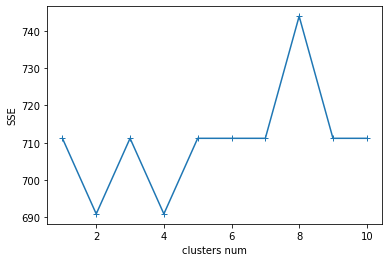

In [16]:
SSE_list = []
for i in range(1, 10+1):
    SKM = ScratchKMeans(n_clusters=3, n_init=3, max_iter=200, tol=0.0001)
    SKM.fit(X)
    sse = SSE(X, SKM.min_best)
    SSE_list.append(sse)
print(SSE_list)

# ｘ軸は１～10のクラスタ、ｙ軸はSSE
plt.plot(range(1,10+1),SSE_list,marker='+')
plt.xlabel('clusters num')
plt.ylabel('SSE')

## 考察
グラフがギザギザになってしまいわかりにくいが、2個(もしくは４個）が適していると見られる

# クラスタ分析 卸売業者のデータ分析

In [116]:
# データの読み込み
Wholesale = pd.read_csv('./Wholesale customers data.csv')
Wholesale.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [117]:
# カラム名の確認
Wholesale.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [118]:
# データを対数変換
data = Wholesale.drop(['Channel','Region'],axis=1)
data_log = np.log(data).values
print(data_log.shape)

(440, 6)


In [119]:
# 次元削減
print('次元削減前',data_log.shape)
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca = pca.fit(data_log)
data_pca = pca.transform(data_log)
print('次元削減後：',data_pca.shape)

次元削減前 (440, 6)
次元削減後： (440, 2)


[0.44237417 0.71894523 0.83511865 0.93129585 0.97705265 1.        ]


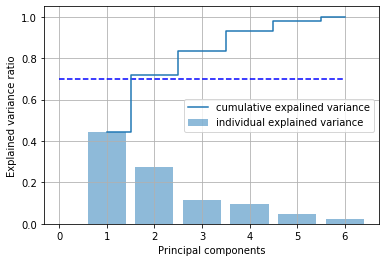

In [120]:
# PCAの分散説明率を表示するコードサンプル
pca = PCA(n_components=None)
pca = pca.fit(data_log)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)
plt.bar(range(1,7), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

## 【問題10】クラスタ数kの選択
最適だと思われるクラスタ数 kを選択してください。エルボー法やシルエット図を活用する他、人間が後々どう利用したいのかも選択に関わってきます。選択した上で、なぜそれを選んだか説明してください。

[3310.816002996101, 3310.816002996101, 3310.816002996101, 3310.816002996101, 3310.816002996101, 3310.816002996101, 3310.816002996101, 3310.816002996101, 3310.816002996101, 3312.7429265710784]


Text(0, 0.5, 'SSE')

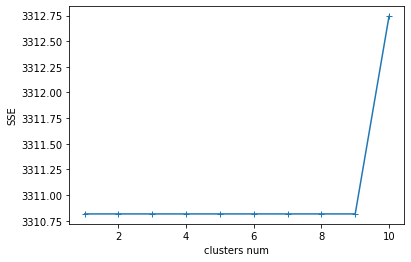

In [121]:
## SSEをいれるリストを用意
SSE_list = []

# クラスター数を１～10まで試してみる
for i in range(1, 10+1):
    SKM = ScratchKMeans(n_clusters=3, n_init=3, max_iter=200, tol=0.0001)
    SKM.fit(data_pca)
    sse = SSE(data_pca, SKM.min_best)
    SSE_list.append(sse)
print(SSE_list)

# ｘ軸は１～10のクラスタ、ｙ軸はSSE
plt.plot(range(1,10+1),SSE_list,marker='+')
plt.xlabel('clusters num')
plt.ylabel('SSE')

### 考察
うまくエルボーになっていないが、３が谷に見えるためクラスタ数は３とする。

## 【問題11】既知のグループとの比較
RegionとChannelはK-meansに使用しなかったが、これれらは既知のグループです。クラスタとこれら既知のグループがどう違うかを確認し、説明してください。まずはそれぞれを可視化してください。

In [122]:
#学習、推定
SKM = ScratchKMeans(n_clusters=3, n_init=5, max_iter=100, tol=0.001)
SKM_fit = SKM.fit(data_pca)
#print("\nSSE:{}".format(SSE))
SKM_pred = SKM.predict(data_pca)
SKM_pred = pd.DataFrame(SKM_pred)
SKM_pred[:4]

,0,1,clus
0,-1.750985,-0.070515,0
1,-1.800365,-0.869754,2
2,-1.893736,-1.676621,2
3,1.127313,-1.457982,2


In [123]:
channel = np.array(Wholesale["Channel"])
region = np.array(Wholesale["Region"])
clusters = np.array(SKM_pred["clus"])
#display(Wholesale)
#display(channel)
#print("channel",np.unique(channel, return_counts=True))
channel = np.unique(channel, return_counts=True)
channel = pd.DataFrame(channel)
channel.columns = channel.iloc[0]
channel = channel.iloc[1]
print("\nchannel", channel)

region = np.unique(region, return_counts=True)
region = pd.DataFrame(region)
region.columns = region.iloc[0]
region = region.iloc[1]
print("\nregion", region)

clusters = np.unique(clusters, return_counts=True)
clusters = pd.DataFrame(clusters)
clusters.columns = clusters.iloc[0]
clusters = clusters.iloc[1]
print("\nclusters",clusters)


channel 0
1    298
2    142
Name: 1, dtype: int64

region 0
1     77
2     47
3    316
Name: 1, dtype: int64

clusters 0
0    143
1    148
2    149
Name: 1, dtype: int64


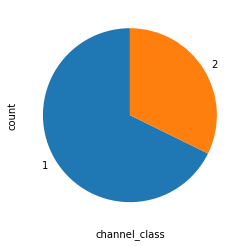

In [124]:
label = [1,2]

plt.ylabel('count')
plt.xlabel('channel_class')
plt.pie(channel, labels = label, startangle=90,)
#plt.plot(y_pred)
plt.grid()
plt.show()

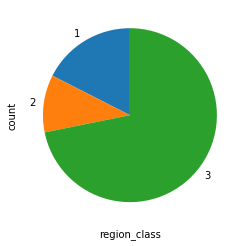

In [125]:
label = [1,2,3]

plt.ylabel('count')
plt.xlabel('region_class')
plt.pie(region, labels = label, startangle=90,)
#plt.plot(y_pred)
plt.grid()
plt.show()

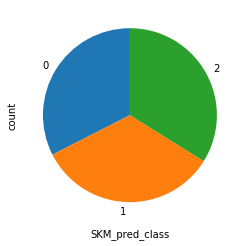

In [126]:
label = [0,1,2]

plt.ylabel('count')
plt.xlabel('SKM_pred_class')
plt.pie(clusters, labels = label, startangle=90,)
#plt.plot(y_pred)
plt.grid()
plt.show()

## 考察
クラス数３でScratchKMeansで推定を行ったところ、人数が均等に割れた。
channelクラスはクラス数２でクラス１に多く分布が偏っており、
regionクラスはクラス数３でクラス３に分布が偏っていた。

## 【問題12】卸売業者にとって有益な情報
卸売業者にとって有益な情報を探し出し文章にまとめてください。

《ヒント》

前処理を行う前のデータを使い、各クラスタの要約統計量を見るなどしてみましょう。また、PCAで次元削減したデータに対してK-meansを使用しましたが、6個の特徴量をそのまま使ったり、一部の特徴量のみを使ったりということも試してみてください。既知のグループとの比較結果も参考にしてください。

条件ごとにデータを見る際にはPandasのgroupbyが便利です。

pandas.DataFrame.groupby — pandas 0.23.4 documentation

In [127]:
# Wholesaleデータにclusterを追加する
Wholesale_clus = pd.concat([Wholesale, SKM_pred['clus']], axis=1)
Wholesale_clus.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,clus
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,2
2,2,3,6353,8808,7684,2405,3516,7844,2
3,1,3,13265,1196,4221,6404,507,1788,2
4,2,3,22615,5410,7198,3915,1777,5185,1


## clusごとに各項目を平均する

In [131]:
Wholesale_clus.groupby(["clus"]).mean().round()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
clus,,,,,,,,
0,1.0,3.0,10949.0,5716.0,8283.0,2455.0,2955.0,1471.0
1,1.0,3.0,11944.0,5780.0,7822.0,3564.0,2894.0,1712.0
2,1.0,3.0,13065.0,5890.0,7761.0,3175.0,2799.0,1390.0


## 考察（clus)
・生鮮品、冷凍食品、惣菜はクラス１の平均が高い
・ミルク、食品、洗剤、紙はクラスごとの差がそれほどない

## Channelごとに各項目の平均を求める

In [132]:
Wholesale_clus.groupby(["Channel"]).mean().round()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,clus
Channel,,,,,,,,
1,3.0,13476.0,3452.0,3962.0,3748.0,791.0,1416.0,1.0
2,3.0,8904.0,10716.0,16323.0,1653.0,7270.0,1753.0,1.0


## 考察(Channel)
・生鮮品、冷凍品はクラス１の平均が高い
・ミルク、食品、洗剤・紙はクラス２の平均が高い
・惣菜はややクラス２の平均が高い

## Regionごとに各項目の平均を求める

In [135]:
Wholesale_clus.groupby(["Region"]).mean().round()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,clus
Region,,,,,,,,
1,1.0,11102.0,5486.0,7403.0,3000.0,2651.0,1355.0,1.0
2,1.0,9888.0,5088.0,9219.0,4045.0,3687.0,1160.0,1.0
3,1.0,12533.0,5977.0,7896.0,2945.0,2818.0,1621.0,1.0


## 考察(Region)
・生鮮品、ミルク、惣菜はクラス３の平均が高い
・食品、冷凍品、洗剤、紙はクラス２の平均が高い